# NVCL_KIT Tray Image Demonstration

*Acknowledgment: Borehole dataset courtesy of South Australia Department for Energy
and Mining. (https://energymining.sa.gov.au/minerals)*

In [1]:
from nvcl_kit.reader import NVCLReader 

In [2]:
from types import SimpleNamespace

In [3]:
param = SimpleNamespace()

Set the URL for the WFS service

In [4]:
param.WFS_URL = "https://sarigdata.pir.sa.gov.au/geoserver/ows"

Set the URL for the NVCL service

In [5]:
param.NVCL_URL = "https://sarigdata.pir.sa.gov.au/nvcl/NVCLDataServices"

In [6]:
param.MAX_BOREHOLES = 20

 Initialise reader object and check for errors

In [7]:
reader = NVCLReader(param)
if not reader.wfs:
        print("ERROR!")

Get list of WFS borehole information, print number of boreholes in list

In [8]:
bh_list = reader.get_boreholes_list()
print(len(bh_list))

20


Print WFS information from the 6th borehole in the list, called 'OBD 12'

In [9]:

print(bh_list[5])

{'nvcl_id': '1040', 'x': 132.2554543, 'y': -29.60077913, 'href': 'https://sarigdata.pir.sa.gov.au/nvcl/resource/feature/PIRSA/borehole/1040', 'name': 'OBD 12', 'description': 'stratigraphic borehole, water borehole', 'purpose': 'lithostratigraphy determination, water borehole/monitoring', 'status': 'unknown', 'drillingMethod': 'diamond core', 'operator': 'Western Mining Corporation Ltd.', 'driller': '', 'drillStartDate': '', 'drillEndDate': '1981-12-02', 'startPoint': 'natural ground surface', 'inclinationType': 'vertical', 'boreholeMaterialCustodian': 'South Australia Drill Core Reference Library', 'boreholeLength_m': '474.4', 'elevation_m': '210.997', 'elevation_srs': 'http://www.opengis.net/def/crs/EPSG/0/5711', 'positionalAccuracy': 'unknown', 'source': 'https://minerals.sarig.sa.gov.au/Details.aspx?DRILLHOLE_NO=1040', 'parentBorehole_uri': '', 'metadata_uri': 'https://catalog.sarig.sa.gov.au/geonetwork/srv/eng/catalog.search#/metadata/03b3f51f-4118-4007-9fe8-73f24ac1eab3', 'generi

In [10]:
nvcl_id_list = reader.get_nvcl_id_list()

Get dataset ids from 'OBD 12'

In [11]:
datasetid_list = reader.get_datasetid_list(nvcl_id_list[5])

In [12]:
print(datasetid_list)


['336d526b-0d79-49a3-b0b9-0015788528a']


Display tray image

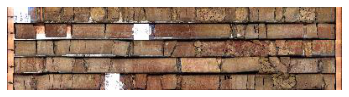

In [13]:
import io
from PIL import Image
import matplotlib.pyplot as plt
ilog_list = reader.get_tray_thumb_imglogs(datasetid_list[0])

# Loop over tray images
for ilog in ilog_list:
    
    # Display first image, then exit loop
    image_data = reader.get_tray_thumb_jpg(ilog.log_id)
    image = Image.open(io.BytesIO(image_data))
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    break